In [100]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
mpl.rc("savefig", dpi=200)


data = pd.read_csv('../data/yeast.csv', header=None).values
df_all = pd.read_csv('../data/fittedVals.csv',index_col=0)


df_labels = df_all.columns
df_labels = list(map(lambda s: s.replace("_ct_bin",""), df_all.columns))
df_labels = list(map(lambda s: s.replace("_mode",""), df_labels))
df_all.columns = df_labels

df_all=df_all[['hairtype','service','ethnicity','breastappearance',
               'build','haircolor','fellatio','intercoursevaginal',
               'kissing','cunninlingus','massage','manualpenilestimulation',
               'manualvaginalstimulation','testiclestimulation','cuddling',
               'ejaculationonbody','intercourseanal','analoral','manualanalstimulation',
               'threesome','sm']]





data = df_all.values
from kmeans.utilities import generate_random_subset
data = generate_random_subset(data,10000)[1]

In [101]:
import time
from sklearn.cluster import KMeans

start = time.time()
stock = KMeans(n_clusters=3,n_init=100,max_iter=100)
stock.fit(data)
timing = time.time()-start
print(timing)
centers, labels = stock.cluster_centers_,stock.labels_

print(stock.inertia_)

1.857874870300293
94117.2166147


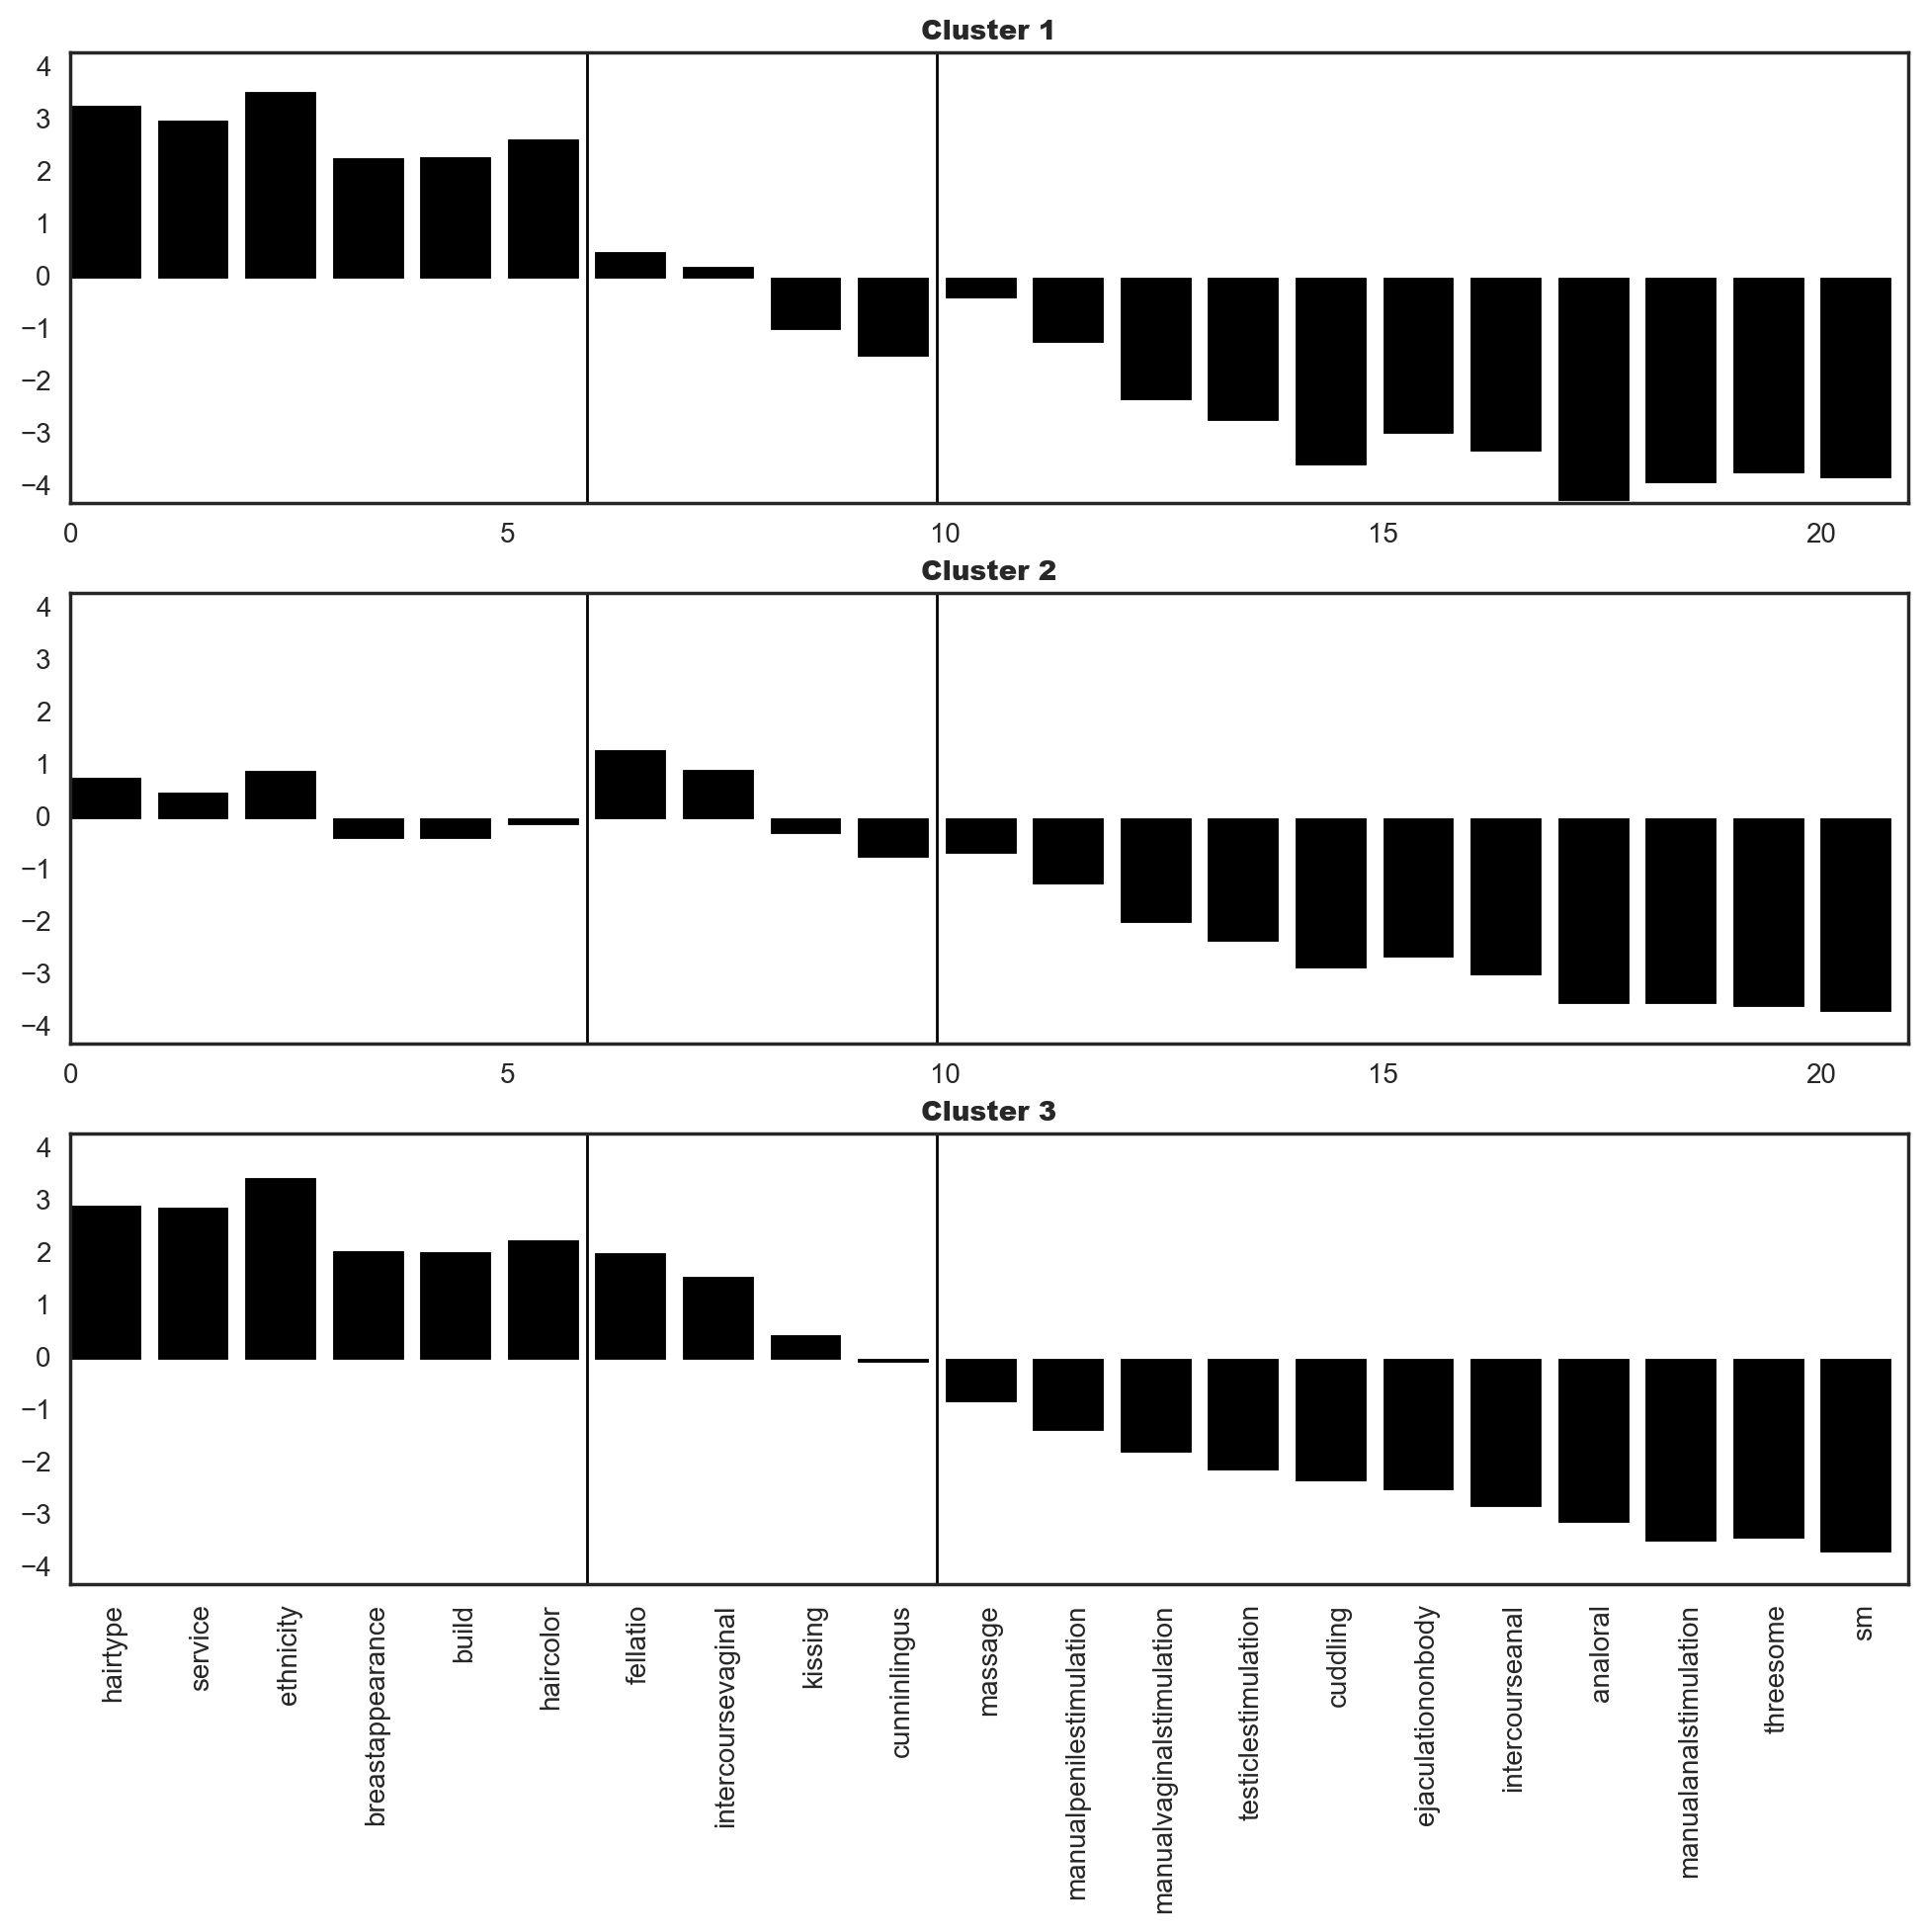

In [134]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)

#cntrs = np.exp(centers)/(1 + np.exp(centers)  )
cntrs = centers

plt.title("Cluster 1",fontname="Arial Black",fontsize=10)
plt.bar(range(len(cntrs[0])), cntrs[0],color='black')
plt.axvline(x=5.9, ymin=0, ymax=1, color='black',linewidth=1)
plt.axvline(x=9.9, ymin=0, ymax=1, color='black',linewidth=1)

plt.xlim(0,21)
plt.ylim(-4.3,4.3)

plt.subplot(3,1,2)
plt.title("Cluster 2",fontname="Arial Black",fontsize=10)
plt.bar(range(len(cntrs[1])), cntrs[1],color='black')
plt.axvline(x=5.9, ymin=0, ymax=1, color='black',linewidth=1)
plt.axvline(x=9.9, ymin=0, ymax=1, color='black',linewidth=1)

plt.xlim(0,21)
plt.ylim(-4.3,4.3)

ax = plt.subplot(3,1,3)
plt.title("Cluster 3",fontname="Arial Black",fontsize=10)
plt.bar(np.arange(len(cntrs[2])), cntrs[2],color='black')
plt.axvline(x=5.9, ymin=0, ymax=1, color='black',linewidth=1)
plt.axvline(x=9.9, ymin=0, ymax=1, color='black',linewidth=1)

plt.xlim(0,21)
plt.ylim(-4.3,4.3)

plt.xticks(np.arange(len(cntrs[2]))+0.5,df_all.columns)

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()